## LBVAR Noninformative

Noinformative LBVAR 모형에 대한 자세한 설명은 `manual/LBVAR Noninfo.md` 참고.

### 데이터 불러오기: 한국 콜금리, CPI, GDP, 조세, 정부지출 데이터

In [3]:
import pandas as pd
import numpy as np

In [4]:
# # large 데이터 로드
df = pd.read_excel("../data/IRF_Korea_Data.xlsx", index_col=0)

# 컬럼에 로그 (call 제외)
df["CPI"] = np.log(df["CPI"])
df["GDP"] = np.log(df["GDP"])
df["Tax"] = np.log(df["Tax"])
df["Government_Spending"] = np.log(df["Government_Spending"])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2000-03-01 to 2023-12-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Call                 96 non-null     float64
 1   CPI                  96 non-null     float64
 2   GDP                  96 non-null     float64
 3   Tax                  96 non-null     float64
 4   Government_Spending  96 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


,Call,CPI,GDP,Tax,Government_Spending
Quarter,,,,,
2000-03-01,4.981847,4.136761,15.364991,13.581872,13.525739
2000-06-01,5.036268,4.134161,15.379946,13.444135,13.548638
2000-09-01,5.127937,4.149379,15.403475,13.490926,13.613575
2000-12-01,5.356287,4.161732,15.390611,13.191486,13.568085
2001-03-01,5.167332,4.172898,15.406336,13.549552,13.613650


`bok_da` 시계열분석 패키지 `ts`의 `lbvar` 모듈에서 `LBVAR_Noninformative` 클래스를 불러온 후, `model` 객체를 생성한다.

In [5]:
from bok_da.ts.lbvar import LBVAR_Noninformative

model = LBVAR_Noninformative(p=4, ndraws=10000, verbose=True)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Verbose: True


`model`의 `fit()` 메서드를 이용해 `LBVAR_Noninformative` 모형을 추정한다.

In [4]:
model.fit(df)

> Posterior Draw (Non-informative Prior)


100%|██████████| 10000/10000 [00:01<00:00, 5341.59it/s]


`Draw.variable_summary()` 메서드를 이용해 모형 파라미터에 대한 요약정보를 볼 수 있다.

In [5]:
model.Draw.variable_summary()

added | variable  | type    |   size(KB) | info
----------------------------------------------------
    1 | Sigma     | ndarray |   1953.266 | shape=(5, 5, 10000)
    2 | Bet       | ndarray |   8203.266 | shape=(5, 21, 10000)
    3 | Bet_Prime | ndarray |   8203.266 | shape=(21, 5, 10000)
    4 | U_B       | ndarray |  35937.641 | shape=(92, 5, 10000)


`model`의 `recursive_irf()` 메서드를 이용해 충격반응함수를 구한다.

In [6]:
model.recursive_irf()

> Impulse Response Calculating...


2/2: 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]


> Forecast error variance decomposition Calculating...


4/4: 100%|██████████| 10000/10000 [00:00<00:00, 53241.33it/s]


> Historical Decomposition Calculating...


3/3: 100%|██████████| 10000/10000 [00:50<00:00, 196.36it/s]


> Done.


`model`의 `plot_irf_shock_series()` 메서드를 이용해 변수별 충격의 시계열을 plot한다.

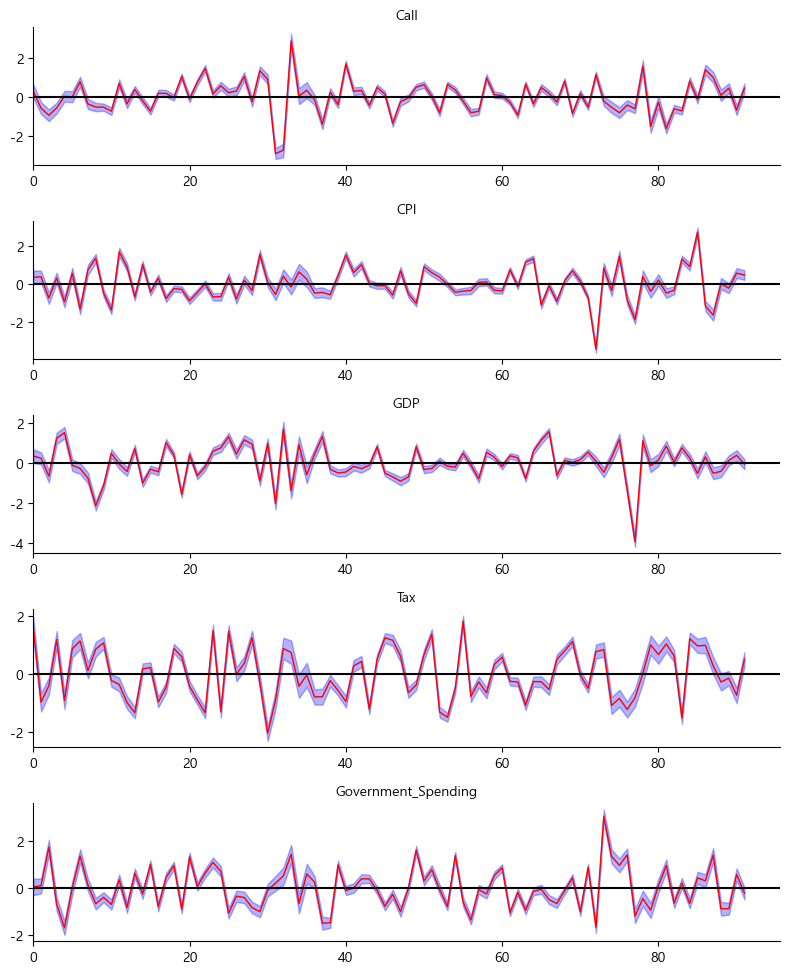

In [7]:
model.plot_irf_shock_series(df.columns)

`model`의 `plot_irf_impulse_response()` 메서드를 이용해 충격반응함수를 plot한다.

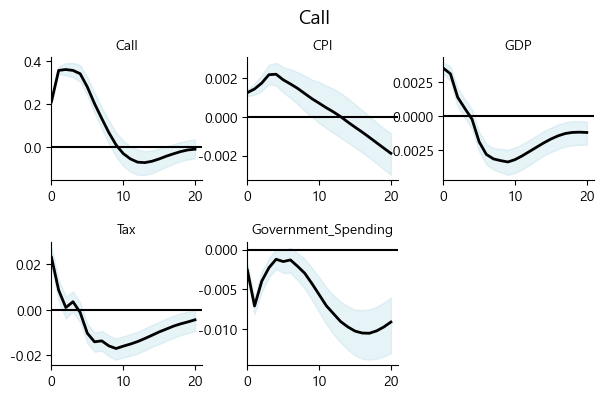

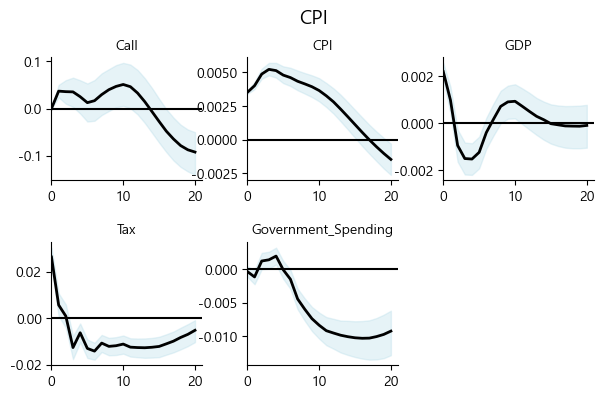

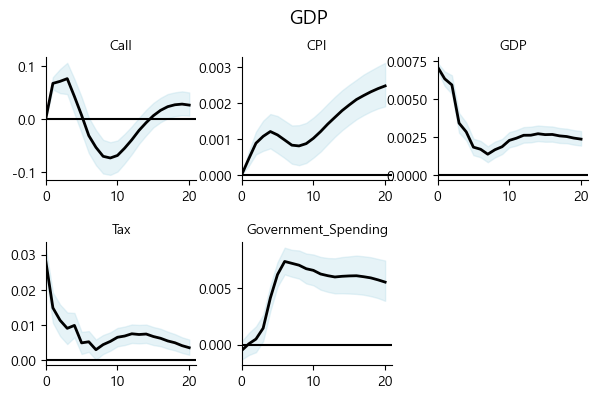

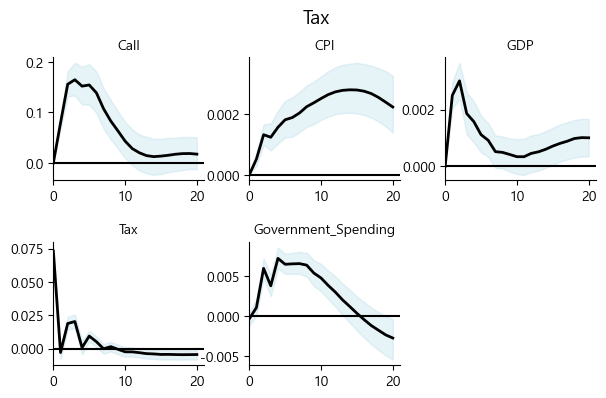

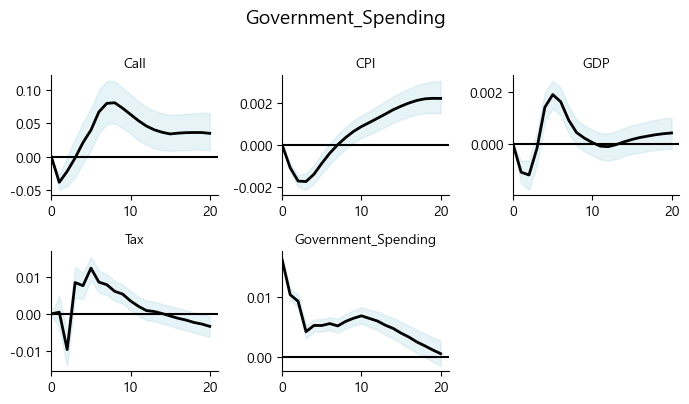

In [8]:
model.plot_irf_impulse_response(df.columns)

`plot_irf_FEVD()`를 이용해 예측오차 분산분해 결과를 시각화할 수 있다.

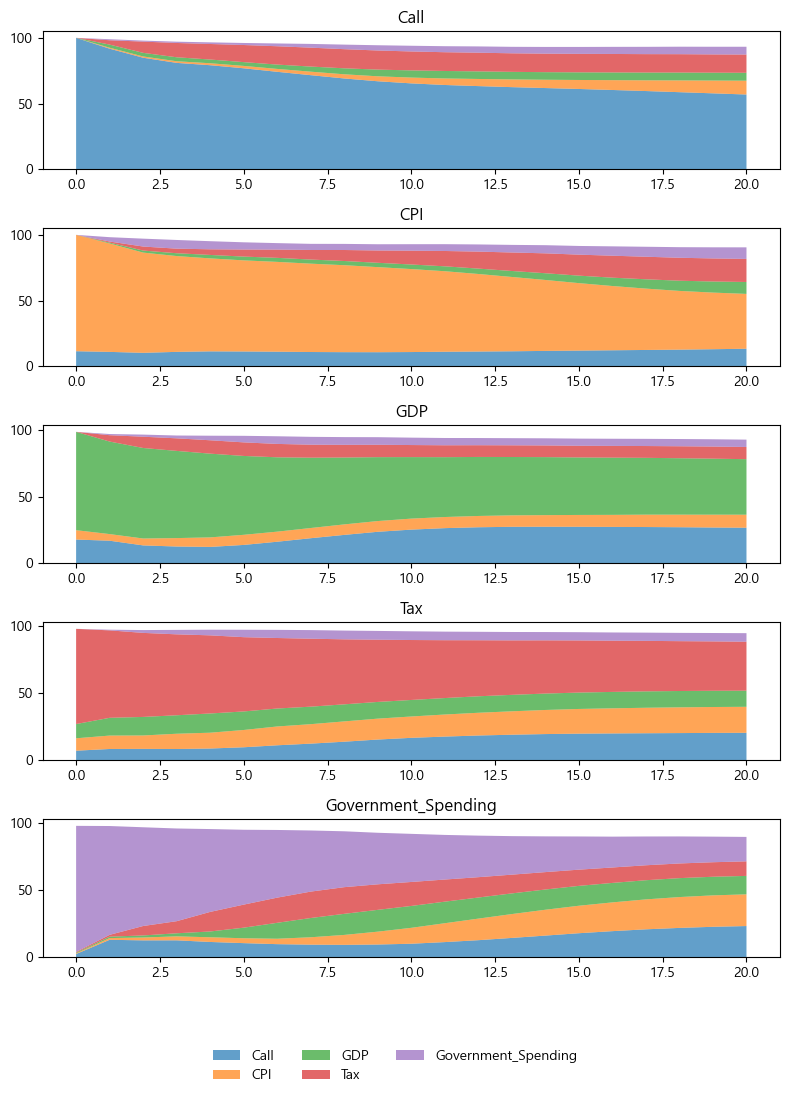

In [9]:
model.plot_irf_FEVD(df.columns)

`plot_irf_historical_decomposition()` 메서드를 통해 역사적분해 결과를 시각화할 수 있다.

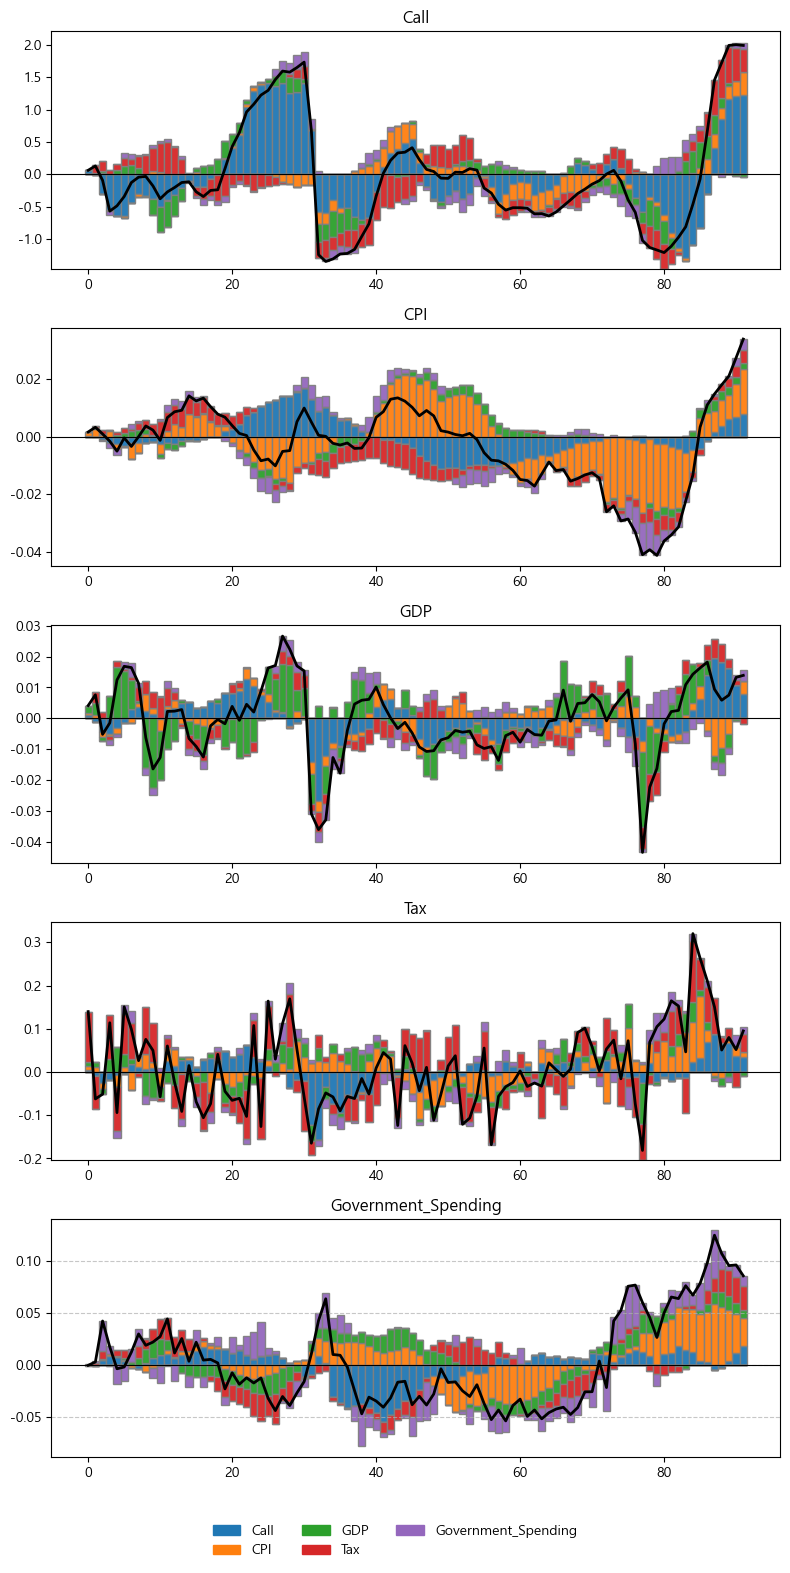

In [10]:
model.plot_irf_historical_decomposition(df.columns)